# MAYURI MAKARAND BARSHETTY
# DATA SCIENCE TASK2: Predicting the optimum number of clusters and represent it visually using the Iris dataset
# Unsupervised Machine Learning : k-means Clustering

In [1]:
# Importing the Libraries
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd
import seaborn as sns
from sklearn import datasets
%matplotlib inline

# STEP 1: DATA PREPROCESSING

In [2]:
#Loading the inbuilt iris dataset
iris = datasets.load_iris()
irisdata= pd.DataFrame(iris.data, columns = iris.feature_names)
irisdata.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
# Feature names in the Dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Target of Data
df=pd.DataFrame(iris.target)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Shape of the data
irisdata.shape

(150, 4)

In [7]:
# Summary of Data
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
#List our columns 
columns = irisdata.columns
columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
# Statistics that summarize the central tendency, dispersion and shape of a dataset's distribution
irisdata.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Correlation
irisdata.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


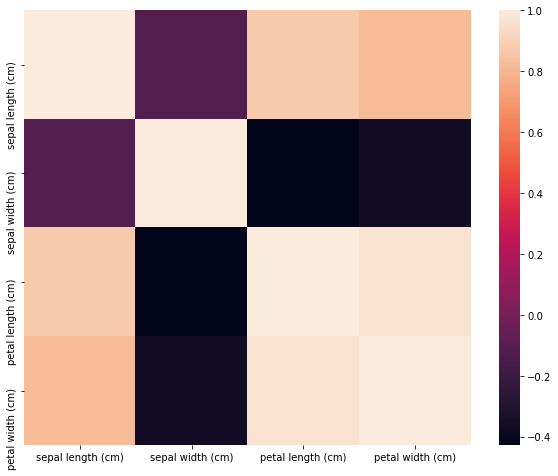

In [11]:
# Heatmap
mtp.subplots(figsize=(10,8))
sns.heatmap(irisdata.corr())

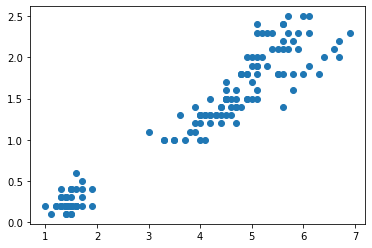

In [12]:
#Visualisation of the clusters
irisdata.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width']
mtp.scatter(irisdata.Petal_length, irisdata.Petal_width)

In [13]:
x = irisdata.iloc[:, [0,1,2,3]].values 
df=pd.DataFrame(x)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Step 2: Finding the optimal number of clusters using the elbow method

In [14]:
# Finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS

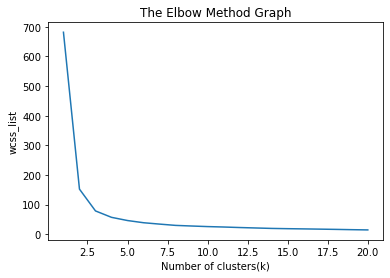

In [15]:
#Using for loop for iterations from 1 to 20.  
for i in range(1, 21):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 21), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

# Step 3: Training the K-means algorithm on the training dataset

In [16]:
# Training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

# Step 4: Visualizing the Clusters

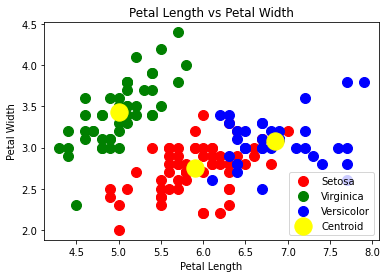

In [17]:
# Visualizing the clusters  
# For first cluster
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'red', label = 'Setosa')
# For second cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Virginica')
# For third cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'blue', label = 'Versicolor')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', 
            label = 'Centroid')
mtp.title('Petal Length vs Petal Width')  
mtp.xlabel('Petal Length')  
mtp.ylabel('Petal Width')  
mtp.legend()  
mtp.show()

# Unsupervised Machine Learning : Hierarchical Clustering

In [18]:
# Importing the Libraries
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd
import seaborn as sns
from sklearn import datasets
%matplotlib inline

# STEP 1: DATA PREPROCESSING

In [19]:
#Loading the inbuilt iris dataset
iris = datasets.load_iris()
irisdata = pd.DataFrame(iris.data, columns = iris.feature_names)
irisdata.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# Step 2: Finding the optimal number of clusters using the Dendrogram

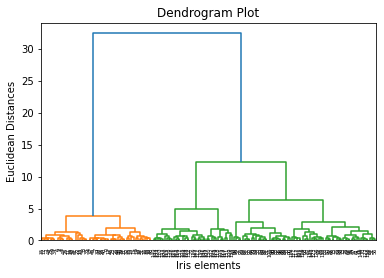

In [20]:
# Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogram Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Iris elements") 
mtp.show()

# Step 3: Training the hierarchical clustering model

In [21]:
# Training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)

In [22]:
df1=pd.DataFrame(y_pred)
df1

,0
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,0
147,2
148,2


# Step 4: Visualizing the clusters

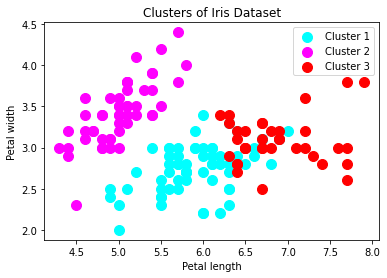

In [23]:
# Visualizing the clusters  
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'cyan', label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'magenta', label = 'Cluster 2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3') 
mtp.title('Clusters of Iris Dataset')  
mtp.xlabel('Petal length')  
mtp.ylabel('Petal width')  
mtp.legend()  
mtp.show()